# Session 1 - Your "first" DataScience problem

In [1]:
# some imports

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
 
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.rc('font', size=12) 
plt.rc('figure', figsize = (12, 5))

# Settings for the visualizations
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

import pandas as pd
pd.set_option('display.max_rows', 25)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 50)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# create output folder
if not os.path.exists('output'):
    os.makedirs('output')
if not os.path.exists('output/session1'):
    os.makedirs('output/session1')

In [2]:
## load data
train_set = pd.read_csv('dataset/housing-snapshot/train_set.csv',index_col=0) 
test_set = pd.read_csv('dataset/housing-snapshot/test_set.csv',index_col=0) 
train_set.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,5432.000000,5.432000e+03,5432.000000,5432.000000,5432.000000,5432.000000,5407.000000,5432.000000,2890.000000,3302.000000,5432.000000,5432.000000,5432.000000
mean,2.937224,1.078470e+06,10.220692,3106.552835,2.917342,1.538660,1.630109,537.054676,163.462430,1965.219564,-37.809664,144.995491,7438.537555
std,0.951947,6.470654e+05,5.996967,95.185290,0.988414,0.704286,0.982855,1550.867601,843.189116,36.244398,0.079365,0.106382,4368.906756
min,1.000000,1.450000e+05,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1830.000000,-38.174880,144.542370,389.000000
25%,2.000000,6.500000e+05,6.200000,3046.000000,2.000000,1.000000,1.000000,182.750000,92.000000,1940.000000,-37.856648,144.930800,4294.000000
50%,3.000000,9.015000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,450.000000,125.000000,1970.000000,-37.802635,145.000250,6543.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,654.250000,174.750000,1999.000000,-37.757238,145.059225,10331.000000
max,8.000000,8.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,75100.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


## The problem
The machine learning is to predict the house price, but before that it is imporntat to study the dataset and its features

In [3]:
# print the dataset size
print("There is", train_set.shape[0], "samples")
print("Each sample has", train_set.shape[1], "features")

There is 5432 samples
Each sample has 21 features


In [4]:
# print the top elements from the dataset
train_set.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
index,,,,,,,,,,,,,,,,,,,,,
0,Aberfeldie,241 Buckley St,4,h,1380000.0,VB,Nelson,12/08/2017,7.5,3040.0,4.0,2.0,2.0,766.0,NaN,NaN,Moonee Valley,-37.75595,144.90551,Western Metropolitan,1543.0
1,Northcote,67 Charles St,2,h,1100000.0,SP,Jellis,20/05/2017,5.5,3070.0,2.0,1.0,1.0,189.0,NaN,NaN,Darebin,-37.77670,144.99240,Northern Metropolitan,11364.0
2,Balwyn North,42 Maud St,3,h,1480000.0,PI,Jellis,15/10/2016,9.2,3104.0,3.0,1.0,4.0,605.0,116.0,1950.0,Boroondara,-37.79510,145.06960,Southern Metropolitan,7809.0
3,Brunswick,13 Percy St,3,h,1055000.0,S,Nelson,7/05/2016,5.2,3056.0,3.0,1.0,1.0,324.0,NaN,1930.0,Moreland,-37.76530,144.95860,Northern Metropolitan,11918.0
4,Templestowe Lower,253 Thompsons Rd,4,h,1000000.0,VB,hockingstuart,13/08/2016,13.8,3107.0,4.0,3.0,2.0,728.0,164.0,1970.0,Manningham,-37.76800,145.10270,Eastern Metropolitan,5420.0


In [5]:
train_set.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
index,,,,,,,,,,,,,,,,,,,,,
5427,Reservoir,30 Kinsale St,3,h,851500.0,S,Nelson,22/08/2016,11.2,3073.0,3.0,1.0,1.0,0.0,NaN,1930.0,Darebin,-37.72170,144.99540,Northern Metropolitan,21650.0
5428,Fitzroy North,134 Clauscen St,2,h,1400000.0,S,Nelson,26/08/2017,3.6,3068.0,2.0,1.0,1.0,164.0,93.0,1890.0,NaN,-37.77796,144.98374,Northern Metropolitan,6244.0
5429,Richmond,23a Dickmann St,3,t,975000.0,PI,Jellis,22/08/2016,2.6,3121.0,3.0,1.0,1.0,383.0,NaN,1993.0,Yarra,-37.82480,144.99760,Northern Metropolitan,14949.0
5430,Bentleigh East,21 Highview Rd,2,h,722000.0,S,Buxton,16/04/2016,13.9,3165.0,2.0,2.0,1.0,201.0,79.0,2005.0,Glen Eira,-37.92930,145.06570,Southern Metropolitan,10969.0
5431,West Footscray,31 Napoleon St,3,h,860000.0,S,Biggin,26/07/2016,8.2,3012.0,3.0,1.0,2.0,501.0,147.0,1960.0,Maribyrnong,-37.79120,144.86800,Western Metropolitan,5058.0


In [6]:
# As it can be seen the database contains several features, some of them numerical and some of them are categorical.
# It is important to check each of the to understand it.

In [7]:
# we can see the type of each features as follows
train_set.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [8]:
# print those categorical features
train_set.select_dtypes(include=['object']).head()

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
index,,,,,,,,
0,Aberfeldie,241 Buckley St,h,VB,Nelson,12/08/2017,Moonee Valley,Western Metropolitan
1,Northcote,67 Charles St,h,SP,Jellis,20/05/2017,Darebin,Northern Metropolitan
2,Balwyn North,42 Maud St,h,PI,Jellis,15/10/2016,Boroondara,Southern Metropolitan
3,Brunswick,13 Percy St,h,S,Nelson,7/05/2016,Moreland,Northern Metropolitan
4,Templestowe Lower,253 Thompsons Rd,h,VB,hockingstuart,13/08/2016,Manningham,Eastern Metropolitan


In [9]:
# We can check how many different type there is in the dataset using the folliwing line
train_set["Type"].value_counts()

h    3765
u    1191
t     476
Name: Type, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Type'>

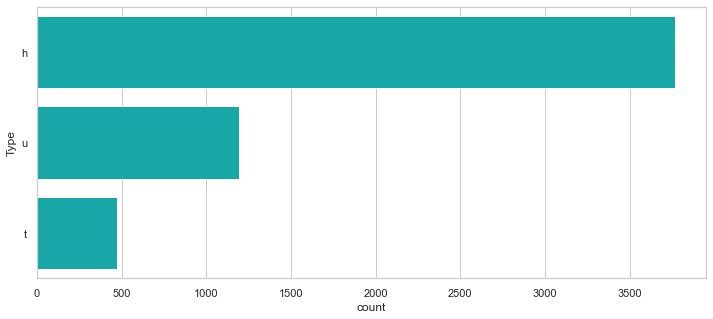

In [10]:
sns.countplot(y="Type", data=train_set, color="c")

It would be interesting to visualize all features (numerical and catergorical) in order to undertand them.

Check out this blog for plotting distribution: https://seaborn.pydata.org/tutorial/distributions.html
+ Seaborn version of this blog can be different from the one intalled in your machine (version 0.11 has been just realeased)

Check out this blog for plotting categorical data: https://seaborn.pydata.org/tutorial/categorical.html

/Users/johnnynunez/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


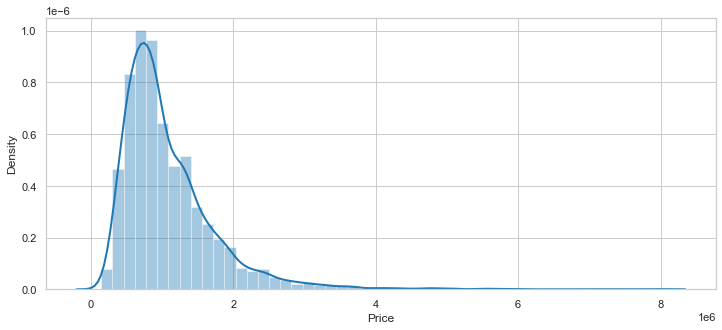

In [11]:
sns.distplot(train_set["Price"])
plt.show()

# Some more distributions

<ipython-input-12-b30b69eb63d2>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  train_set.hist(ax = ax)


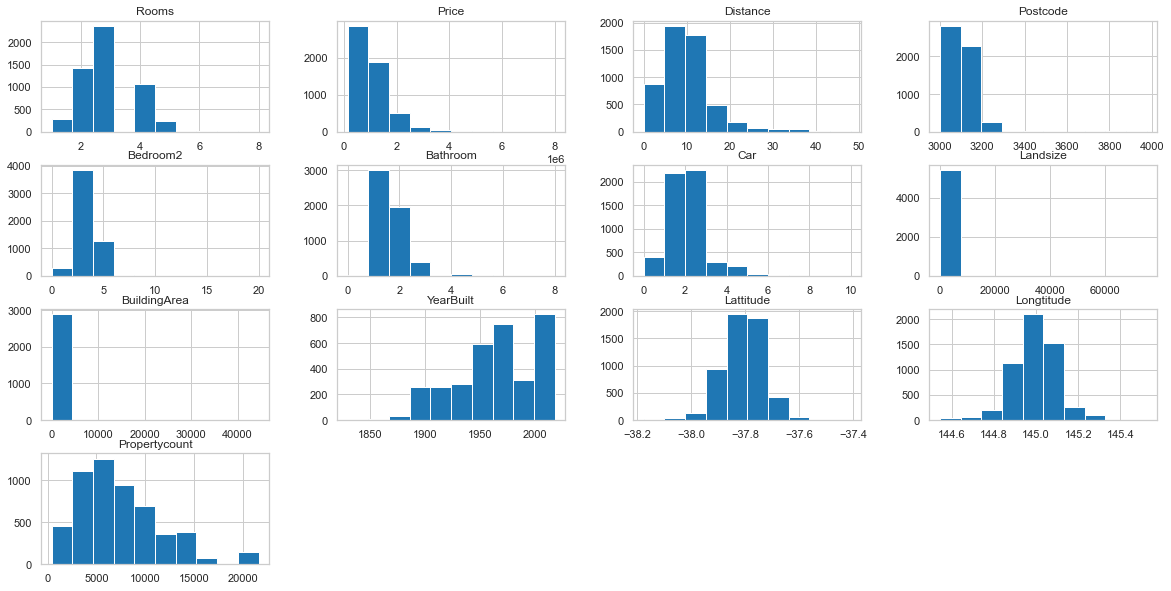

In [12]:
fig = plt.figure(figsize = (20,10))
ax = fig.gca()
train_set.hist(ax = ax)
plt.show()

/Users/johnnynunez/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


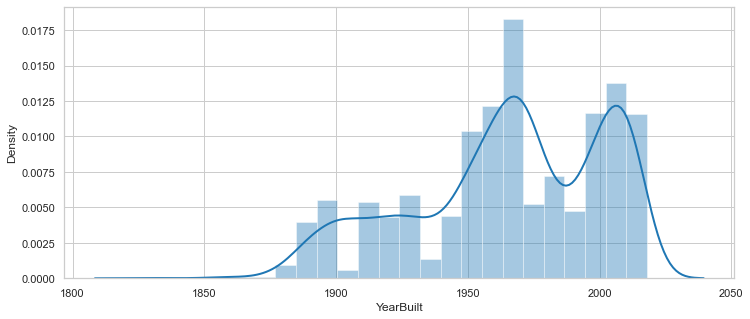

In [13]:
sns.distplot(train_set["YearBuilt"])
plt.show()

/Users/johnnynunez/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


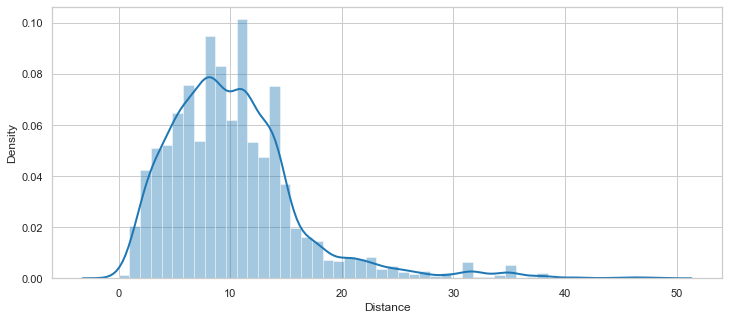

In [14]:
sns.distplot(train_set["Distance"])
plt.show()

/Users/johnnynunez/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


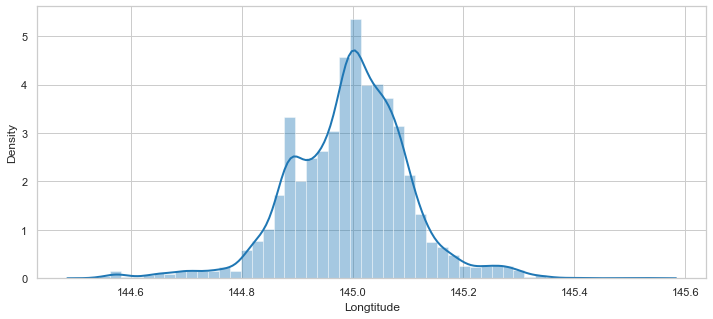

In [15]:
sns.distplot(train_set["Longtitude"])
plt.show()

/Users/johnnynunez/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rooms', ylabel='Density'>

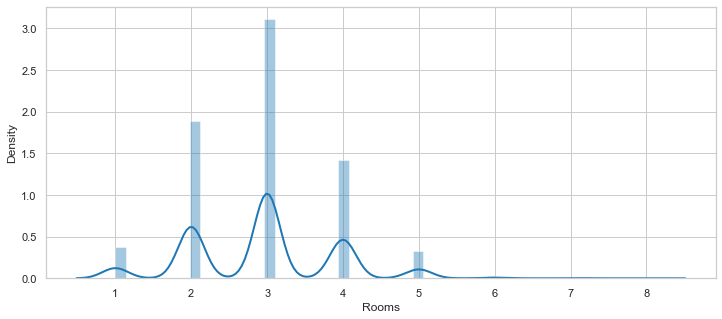

In [16]:
sns.distplot(train_set["Rooms"])

# Obtain dummy variables with pandas


In [17]:
train_set = pd.get_dummies(train_set,columns= ['Regionname','Type','Method'],drop_first=True)

In [18]:
train_set.head()

,Suburb,Address,Rooms,Price,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Propertycount,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,Type_t,Type_u,Method_S,Method_SA,Method_SP,Method_VB
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Aberfeldie,241 Buckley St,4,1380000.0,Nelson,12/08/2017,7.5,3040.0,4.0,2.0,2.0,766.0,NaN,NaN,Moonee Valley,-37.75595,144.90551,1543.0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,Northcote,67 Charles St,2,1100000.0,Jellis,20/05/2017,5.5,3070.0,2.0,1.0,1.0,189.0,NaN,NaN,Darebin,-37.77670,144.99240,11364.0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,Balwyn North,42 Maud St,3,1480000.0,Jellis,15/10/2016,9.2,3104.0,3.0,1.0,4.0,605.0,116.0,1950.0,Boroondara,-37.79510,145.06960,7809.0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,Brunswick,13 Percy St,3,1055000.0,Nelson,7/05/2016,5.2,3056.0,3.0,1.0,1.0,324.0,NaN,1930.0,Moreland,-37.76530,144.95860,11918.0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,Templestowe Lower,253 Thompsons Rd,4,1000000.0,hockingstuart,13/08/2016,13.8,3107.0,4.0,3.0,2.0,728.0,164.0,1970.0,Manningham,-37.76800,145.10270,5420.0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [19]:
test_set = pd.get_dummies(test_set,columns= ['Regionname','Type','Method'],drop_first=True)

In [20]:
test_set.head()

,Suburb,Address,Rooms,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Propertycount,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,Type_t,Type_u,Method_S,Method_SA,Method_SP,Method_VB
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Brighton,1a Mair St,3,Buxton,6/08/2016,11.2,3186.0,3.0,2.0,3.0,588.0,NaN,NaN,Bayside,-37.9287,144.9920,10579.0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,West Melbourne,5/467 King St,2,Jellis,28/05/2016,1.9,3003.0,2.0,1.0,1.0,0.0,83.0,2002.0,Melbourne,-37.8091,144.9520,2230.0,0,1,0,0,0,0,0,0,1,1,0,0,0
2,St Kilda,7/29 Marine Pde,3,McGrath,22/04/2017,6.1,3182.0,3.0,1.0,0.0,0.0,115.0,1930.0,Port Phillip,-37.8718,144.9767,13240.0,0,0,0,0,1,0,0,0,1,0,0,1,0
3,Pascoe Vale,8/16 Pascoe St,3,Trimson,18/06/2016,9.9,3044.0,3.0,2.0,1.0,146.0,106.0,2006.0,Moreland,-37.7152,144.9346,7485.0,0,1,0,0,0,0,0,1,0,0,0,0,1
4,South Kingsville,2/77 Vernon St,2,Gunn&Co,24/09/2016,9.1,3015.0,2.0,1.0,2.0,462.0,NaN,1970.0,Hobsons Bay,-37.8331,144.8715,984.0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [21]:
train_set = train_set.drop(['Suburb', 'Address', 'SellerG','Date','CouncilArea'],axis=1)

# Remove outliers

In [22]:
train_set = train_set[(train_set["Price"]>0) & (train_set["Price"] <= 6500000.0)]

In [23]:
test_set = test_set.drop(['Suburb', 'Address', 'SellerG','Date','CouncilArea'],axis=1)

In [24]:
train_set

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,Type_t,Type_u,Method_S,Method_SA,Method_SP,Method_VB
index,,,,,,,,,,,,,,,,,,,,,,,,,,
0,4,1380000.0,7.5,3040.0,4.0,2.0,2.0,766.0,NaN,NaN,-37.75595,144.90551,1543.0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,2,1100000.0,5.5,3070.0,2.0,1.0,1.0,189.0,NaN,NaN,-37.77670,144.99240,11364.0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,3,1480000.0,9.2,3104.0,3.0,1.0,4.0,605.0,116.0,1950.0,-37.79510,145.06960,7809.0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,3,1055000.0,5.2,3056.0,3.0,1.0,1.0,324.0,NaN,1930.0,-37.76530,144.95860,11918.0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,4,1000000.0,13.8,3107.0,4.0,3.0,2.0,728.0,164.0,1970.0,-37.76800,145.10270,5420.0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5427,3,851500.0,11.2,3073.0,3.0,1.0,1.0,0.0,NaN,1930.0,-37.72170,144.99540,21650.0,0,1,0,0,0,0,0,0,0,1,0,0,0
5428,2,1400000.0,3.6,3068.0,2.0,1.0,1.0,164.0,93.0,1890.0,-37.77796,144.98374,6244.0,0,1,0,0,0,0,0,0,0,1,0,0,0
5429,3,975000.0,2.6,3121.0,3.0,1.0,1.0,383.0,NaN,1993.0,-37.82480,144.99760,14949.0,0,1,0,0,0,0,0,1,0,0,0,0,0


# Standard Scale

In [25]:
from sklearn.preprocessing import StandardScaler

y = train_set[['Price']]

train_set = train_set.drop(['Price'],axis=1)

train_set = train_set.fillna(train_set.mean())
test_set = test_set.fillna(test_set.mean())

sc_X = StandardScaler()
X = sc_X.fit_transform(train_set.values)
X_test = sc_X.transform(test_set.values)

X = pd.DataFrame(X)
X.columns = train_set.columns.tolist()
train_set = X

X_test = pd.DataFrame(X_test)
X_test.columns = test_set.columns.tolist()

test_set = X_test

## BASELINE MODEL
### https://www.kaggle.com/c/mlub-housing-house-prediction/notebooks

This is a simple model that uses the K-nearest Neighbors Regressor

This model only uses 4 feaures: 'Rooms','Landsize', 'BuildingArea', 'YearBuilt'

----- EVALUATION ON TRAIN SET ------
RMSE 249911.05104413425
R^2:  0.8476214559727269


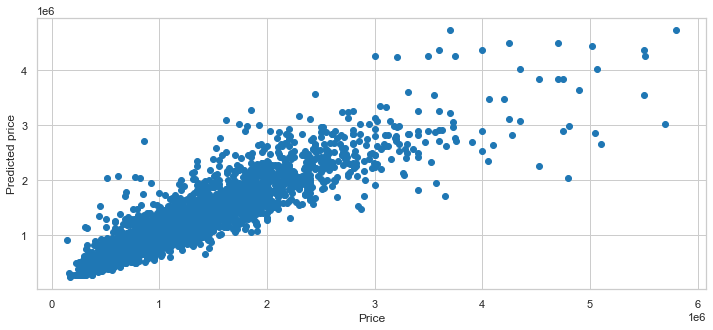

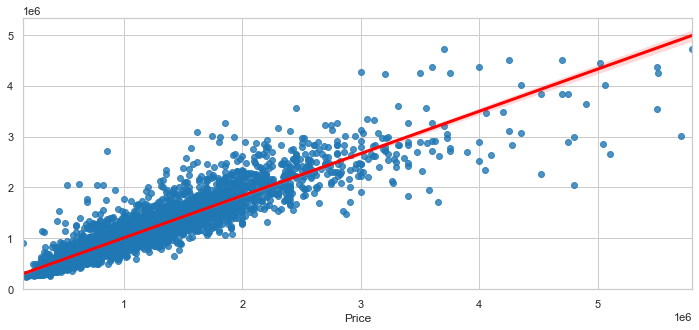

In [26]:
## the features


"""
features = train_set.columns.tolist()
features.remove('Bedroom2')
features.remove('Car')
features.remove('Bathroom')
features.remove('Postcode')
"""
features = ['Longtitude','Rooms','Distance','Lattitude','Landsize']

## DEFINE YOUR FEATURES
X = train_set[features]
#y = train_set[['Price']]

## the model
# KNeighborsRegressor
from sklearn import neighbors
n_neighbors = 7 # you can modify this paramenter (ONLY THIS ONE!!!)
model = neighbors.KNeighborsRegressor(n_neighbors)

## fit the model
model.fit(X, y)

## predict training set
y_pred = model.predict(X)

## Evaluate the model and plot it
from sklearn.metrics import mean_squared_error, r2_score
print("----- EVALUATION ON TRAIN SET ------")
print("RMSE",np.sqrt(mean_squared_error(y, y_pred)))
print("R^2: ",r2_score(y, y_pred))


plt.scatter(y, y_pred)
plt.xlabel('Price')
plt.ylabel('Predicted price');
plt.show()
ax = sns.regplot(x=y, y=y_pred,line_kws={"color": "red"} )



## predict the test set and generate the submission file
X_test = test_set[features]
y_pred = model.predict(X_test)

df_output = pd.DataFrame(y_pred)
df_output = df_output.reset_index()
df_output.columns = ['index','Price']

df_output.to_csv('output/session1/neighbours.csv',index=False)

Mean error: 615434.38
RMSE 852709.9351718051


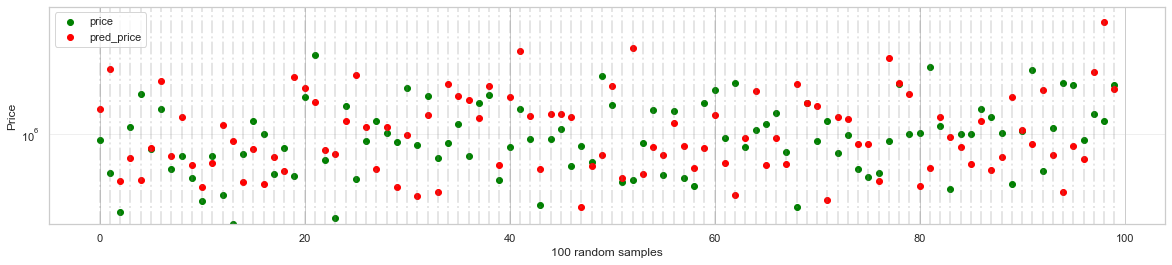

In [27]:
if __name__ == '__main__':
    # Mostrem únicament 100 dades en el gràfic
    size = 100
    sample = np.random.choice(X.shape[0], size=size, replace=False)
    y = y.to_numpy()
    y_pred = y_pred[:X.shape[0]]
    # Mínima i màxima Y a mostrar en el gràfic
    miny = np.minimum(y_pred[sample].min(), y[sample].min()) + 1e2
    maxy = np.maximum(y_pred[sample].max(), y[sample].max()) + 1e6

    # Visualització de les dades originals i les prediccions
    plt.figure(figsize=(20, 4))
    plt.scatter(range(size), y[sample], color='green', label = 'price')
    plt.scatter(range(size), y_pred[sample], color='red', label = 'pred_price')
    plt.xlabel('100 random samples')
    plt.ylabel('Price')
    plt.yscale('symlog')
    plt.ylim([miny, maxy])
    plt.grid(axis='y', which='minor', alpha=0.2)
    plt.grid(axis='y', which='major', alpha=0.3)
    plt.legend()

    for x in range(size):
        plt.plot((x, x), (miny, maxy), '-.', color='gray', alpha=0.2)

    print('Mean error: {:.2f}'.format(np.mean(np.abs(y - y_pred))))
    print("RMSE",np.sqrt(mean_squared_error(y, y_pred)))

## EXERCICE - TRAIN A MODEL and upload your best solution to the Kaggle Challenge

Tasks: 
+ Choose the best features for the problem. Some features are numercial but others categorical, think how to codify all of them.
+ Choose the model. You have two choice: LinearRegression and KNeighborsRegressor
    + You can chanege the paramenter n_neighbors from the KNeighborsRegressor
    
LINEAR REGRESSOR:
>from sklearn.linear_model import LinearRegression

>model = LinearRegression()

KNeighborsRegressor
> from sklearn import neighbors

> n_neighbors = 3 # you can modify this paramenter (ONLY THIS ONE!!!)

> model = neighbors.KNeighborsRegressor(n_neighbors=n_neighbors)


----- EVALUATION ON TRAIN SET ------
RMSE 400100.1637171837
R^2:  0.6094376675200914


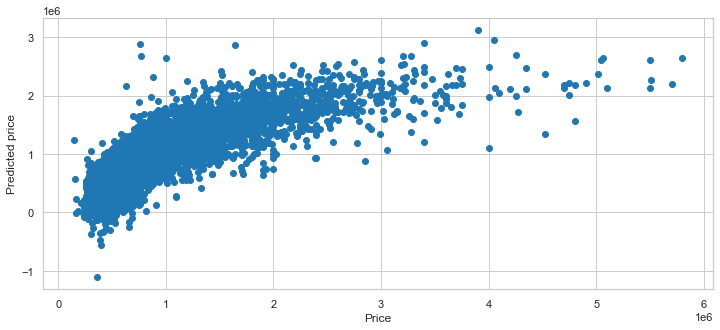

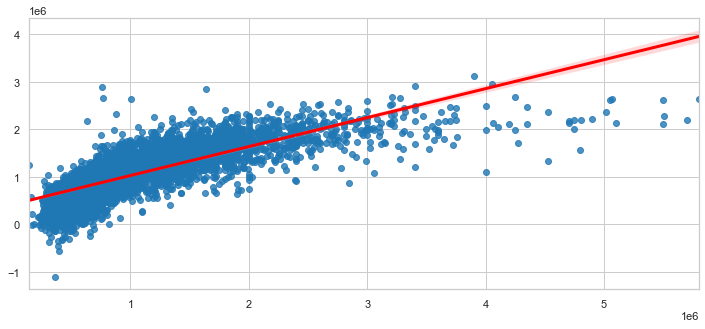

In [28]:
## the features

#features = ['Longtitude','Rooms','Bathroom','Bedroom2','Postcode','Distance','BuildingArea','Lattitude','YearBuilt','Landsize']
features = train_set.columns.tolist()
features.remove('Postcode')

## DEFINE YOUR FEATURES
X = train_set[features]
#y = train_set[['Price']]

## the model
# LinearRegressor
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

## fit the model
lm.fit(X, y)

## predict training set
y_pred = lm.predict(X)

## Evaluate the model and plot it
from sklearn.metrics import mean_squared_error, r2_score
print("----- EVALUATION ON TRAIN SET ------")
print("RMSE",np.sqrt(mean_squared_error(y, y_pred)))
print("R^2: ",r2_score(y, y_pred))




plt.scatter(y, y_pred)
plt.xlabel('Price')
plt.ylabel('Predicted price');
plt.show()
ax = sns.regplot(x=y, y=y_pred,line_kws={"color": "red"} )


## predict the test set and generate the submission file
X_test = test_set[features]
y_pred = lm.predict(X_test)

df_output = pd.DataFrame(y_pred)
df_output = df_output.reset_index()
df_output.columns = ['index','Price']

df_output.to_csv('output/session1/linear_regression.csv',index=False)

Mean error: 613052.02
RMSE 817158.6797009668


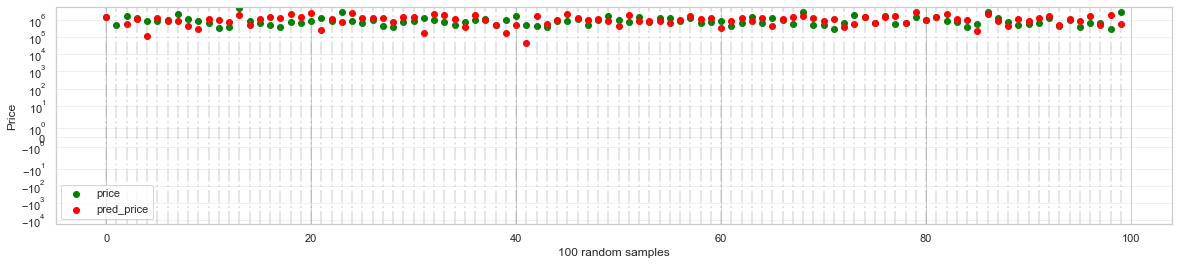

In [29]:
if __name__ == '__main__':
    # Mostrem únicament 100 dades en el gràfic
    size = 100
    sample = np.random.choice(X.shape[0], size=size, replace=False)
    y_pred = y_pred[:X.shape[0]]
    # Mínima i màxima Y a mostrar en el gràfic
    miny = np.minimum(y_pred[sample].min(), y[sample].min()) + 1e5
    maxy = np.maximum(y_pred[sample].max(), y[sample].max()) + 1e6

    # Visualització de les dades originals i les prediccions
    plt.figure(figsize=(20, 4))
    plt.scatter(range(size), y[sample], color='green', label = 'price')
    plt.scatter(range(size), y_pred[sample], color='red', label = 'pred_price')
    plt.xlabel('100 random samples')
    plt.ylabel('Price')
    plt.yscale('symlog')
    plt.ylim([miny, maxy])
    plt.grid(axis='y', which='minor', alpha=0.2)
    plt.grid(axis='y', which='major', alpha=0.3)
    plt.legend()

    for x in range(size):
        plt.plot((x, x), (miny, maxy), '-.', color='gray', alpha=0.2)
    print('Mean error: {:.2f}'.format(np.mean(np.abs(y - y_pred))))
    print("RMSE",np.sqrt(mean_squared_error(y, y_pred)))


In [30]:
display(features)

['Rooms',
 'Distance',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Lattitude',
 'Longtitude',
 'Propertycount',
 'Regionname_Eastern Victoria',
 'Regionname_Northern Metropolitan',
 'Regionname_Northern Victoria',
 'Regionname_South-Eastern Metropolitan',
 'Regionname_Southern Metropolitan',
 'Regionname_Western Metropolitan',
 'Regionname_Western Victoria',
 'Type_t',
 'Type_u',
 'Method_S',
 'Method_SA',
 'Method_SP',
 'Method_VB']

In [31]:
train_set.corr()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,Type_t,Type_u,Method_S,Method_SA,Method_SP,Method_VB
Rooms,1.000000,0.294834,0.063720,0.922184,0.583654,0.404643,0.060289,0.077217,-0.043207,-0.000276,0.082493,-0.081805,0.043066,-0.134749,0.039312,0.089160,-0.061047,0.061257,0.021929,-0.014328,-0.550341,-0.017115,0.019730,-0.026991,-0.011948
Distance,0.294834,1.000000,0.458856,0.290443,0.136971,0.278225,0.077303,0.098660,0.207577,-0.140583,0.222644,-0.050739,0.259204,-0.233052,0.239503,0.440052,-0.183921,0.008269,0.176264,-0.020593,-0.221925,0.063700,0.021812,0.023551,-0.100871
Postcode,0.063720,0.458856,1.000000,0.066543,0.119297,0.056730,0.037155,0.053303,0.048581,-0.407231,0.435853,0.067580,0.314995,-0.229787,0.168724,0.283077,0.374202,-0.410054,0.127819,-0.011838,0.031916,0.015745,0.022462,-0.026062,-0.003461
Bedroom2,0.922184,0.290443,0.066543,1.000000,0.574335,0.395411,0.059443,0.073872,-0.026972,0.002068,0.082027,-0.082114,0.042789,-0.127043,0.038955,0.088802,-0.063427,0.055149,0.022178,-0.016128,-0.517555,-0.025338,0.022942,-0.022429,-0.016366
Bathroom,0.583654,0.136971,0.119297,0.574335,1.000000,0.319791,0.051571,0.068468,0.134988,-0.067598,0.109024,-0.052940,0.038838,-0.154676,0.021232,0.036168,0.093692,-0.023124,-0.005344,0.130559,-0.270264,-0.092674,0.024641,-0.020263,0.062352
Car,0.404643,0.278225,0.056730,0.395411,0.319791,1.000000,0.084102,0.071512,0.094386,-0.024696,0.057457,-0.017888,0.050680,-0.112993,0.030939,0.090693,-0.021074,0.051408,0.009146,-0.015761,-0.280913,-0.013301,0.021606,0.003014,-0.009898
Landsize,0.060289,0.077303,0.037155,0.059443,0.051571,0.084102,1.000000,0.381729,0.021891,0.037367,-0.001115,-0.003466,0.011845,-0.031434,0.150467,0.008812,0.000164,-0.008877,0.004422,-0.044339,-0.009380,-0.011014,0.015801,-0.009747,0.024768
BuildingArea,0.077217,0.098660,0.053303,0.073872,0.068468,0.071512,0.381729,1.000000,0.002521,0.054463,-0.039495,-0.024570,0.003792,-0.021942,0.244226,0.000400,-0.005278,-0.008164,-0.001431,-0.004746,-0.038358,0.010785,0.000328,-0.010064,-0.004581
YearBuilt,-0.043207,0.207577,0.048581,-0.026972,0.134988,0.094386,0.021891,0.002521,1.000000,0.035061,-0.007757,0.005877,0.037592,-0.047600,0.027052,0.048789,-0.061043,0.049785,0.016844,0.254073,0.187185,-0.032289,0.031714,0.026664,0.002146
Lattitude,-0.000276,-0.140583,-0.407231,0.002068,-0.067598,-0.024696,0.037367,0.054463,0.035061,1.000000,-0.364392,0.047695,-0.137375,0.488136,0.154342,-0.443057,-0.509289,0.177945,0.073531,-0.025825,-0.097598,0.000794,0.000152,0.017484,-0.005676


<AxesSubplot:title={'center':'Correlacion'}>

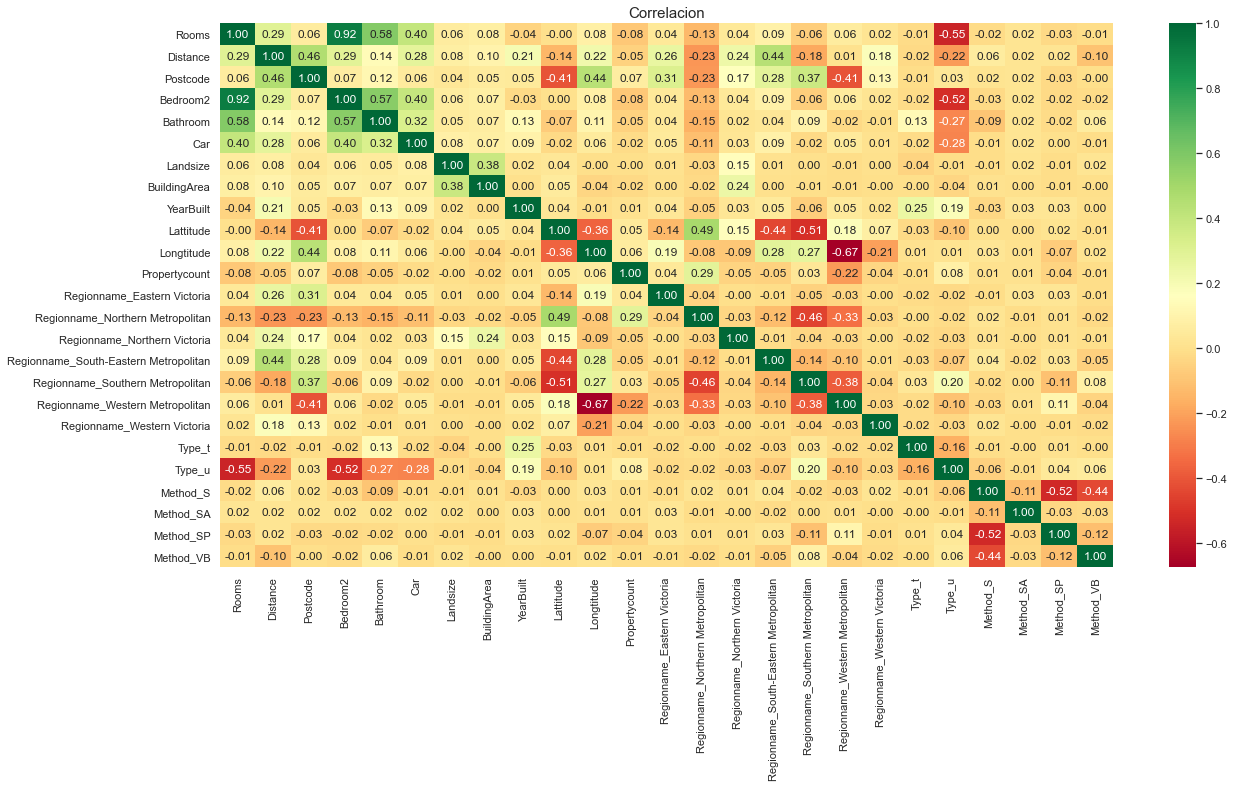

In [32]:
plt.figure(figsize=(20,10))
plt.title('Correlacion',fontsize=15)
sns.heatmap(train_set.corr(),annot=True,fmt='.2f',cmap='RdYlGn')

Explain the choosed model and why you think that is is the best

# Conclusió

# He pogut veure que una linear regression funciona molt be quant tenim moltes  features de input,
# en aquest cas en funciona millor knnregressor amb poques features
# He pogut concloure que un bon data wrangling millora molt el model

### Com a punt, crec que com es pot veure,  
### una vegada normalitzada les dades, dóna la sensació de que segueix una tendencia alcista però no lineal,  
### sino exponencial, és a dir, amb una certa corva

